## Level: Intermediate
## Task 4: Exploratory Data Analysis - Terrorism
## Perform 'Exploratory Data Analysis' on dataset - 'Global Terrorism'
## TSF | GRIP | Data Science and Business Analytics | October batch 2022

### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset - Global Terrorism

In [18]:
df = pd.read_csv('globalterrorism.csv', sep=',', encoding='ISO-8859-1', low_memory=False)
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Check the column values

In [19]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### Rename Columns

In [20]:
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'gname':'Group', 'country_txt':'Country', 
                   'region_txt':'Region', 'latitude': 'Latitude','longitude':'Longitude', 'summary':'Summary',
                   'attacktype1_txt':'AttackType', 'targtype1_txt':'TargetType', 'nkill':'Kill', 'nwound':'Wound'}, inplace=True)

In [21]:
df = df[['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'Latitude', 'Longitude', 'AttackType', 'Kill',
          'TargetType', 'Summary', 'Group', 'Wound', 'motive']]

In [22]:
df.head()

,Year,Month,Day,Country,Region,city,Latitude,Longitude,AttackType,Kill,TargetType,Summary,Group,Wound,motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,Private Citizens & Property,NaN,MANO-D,0.0,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,Government (Diplomatic),NaN,23rd of September Communist League,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,Journalists & Media,NaN,Unknown,0.0,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,Government (Diplomatic),NaN,Unknown,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,Government (Diplomatic),NaN,Unknown,NaN,NaN


### Top 5 rows

In [23]:
df.head(5)

,Year,Month,Day,Country,Region,city,Latitude,Longitude,AttackType,Kill,TargetType,Summary,Group,Wound,motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,Private Citizens & Property,NaN,MANO-D,0.0,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,Government (Diplomatic),NaN,23rd of September Communist League,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,Journalists & Media,NaN,Unknown,0.0,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,Government (Diplomatic),NaN,Unknown,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,Government (Diplomatic),NaN,Unknown,NaN,NaN


### Last 5 rows

In [24]:
df.tail(5)

,Year,Month,Day,Country,Region,city,Latitude,Longitude,AttackType,Kill,TargetType,Summary,Group,Wound,motive
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,Military,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,2.0,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,Military,12/31/2017: Assailants launched mortars at the...,Muslim extremists,7.0,NaN
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,Private Citizens & Property,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),0.0,NaN
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,Government (General),12/31/2017: Assailants threw a grenade at a Fo...,Unknown,0.0,NaN
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,0.0,NaN


### Check the Info

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   Region      181691 non-null  object 
 5   city        181257 non-null  object 
 6   Latitude    177135 non-null  float64
 7   Longitude   177134 non-null  float64
 8   AttackType  181691 non-null  object 
 9   Kill        171378 non-null  float64
 10  TargetType  181691 non-null  object 
 11  Summary     115562 non-null  object 
 12  Group       181691 non-null  object 
 13  Wound       165380 non-null  float64
 14  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 20.8+ MB


### Check the Summary of the data

In [26]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


### Shape of the data

In [27]:
df.shape

(181691, 15)

### Check Null values

In [28]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
city             434
Latitude        4556
Longitude       4557
AttackType         0
Kill           10313
TargetType         0
Summary        66129
Group              0
Wound          16311
motive        131130
dtype: int64

### Check the Duplicate values

In [29]:
df.duplicated().sum()

11532

In [30]:
df.nunique()

Year              47
Month             13
Day               32
Country          205
Region            12
city           36674
Latitude       48322
Longitude      48039
AttackType         9
Kill             205
TargetType        22
Summary       112492
Group           3537
Wound            238
motive         14490
dtype: int64

In [31]:
df['Country'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

## Correlation

<AxesSubplot:>

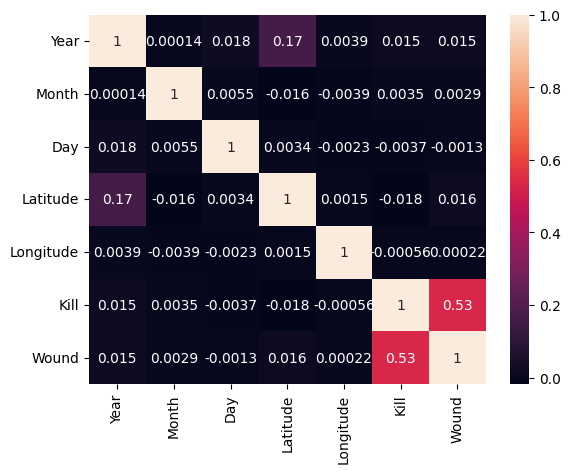

In [32]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

## Data Visualization

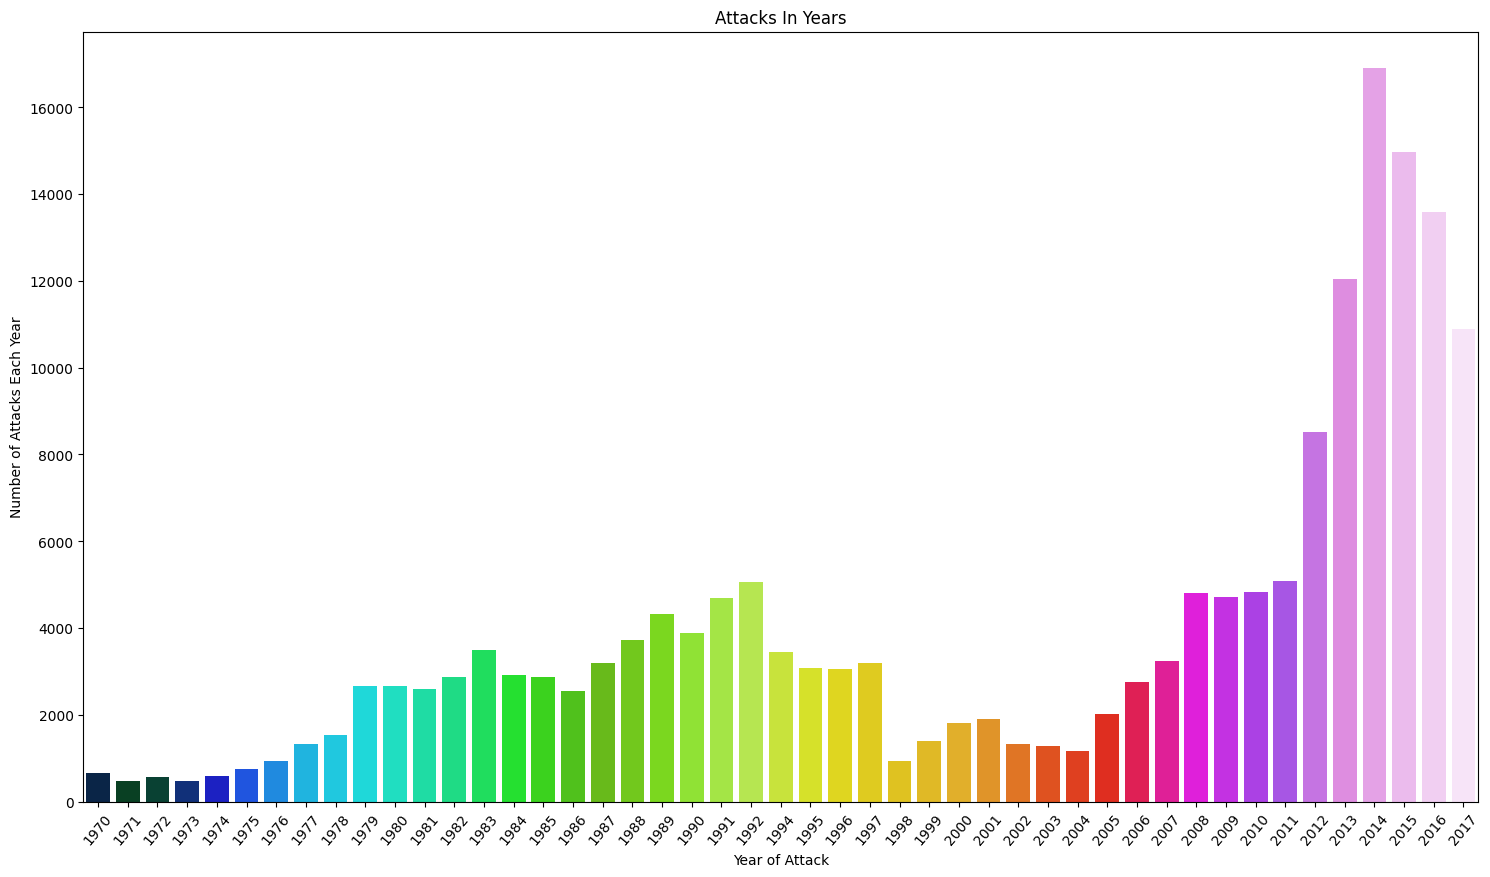

In [33]:
from matplotlib.pyplot import xlabel, xticks, ylabel


x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year, y = y_count_years, palette = 'gist_ncar')
plt.xticks(rotation = 50)
plt.xlabel('Year of Attack')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attacks In Years')
plt.show()

c:\ProgramData\Anaconda3\envs\streamlit_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


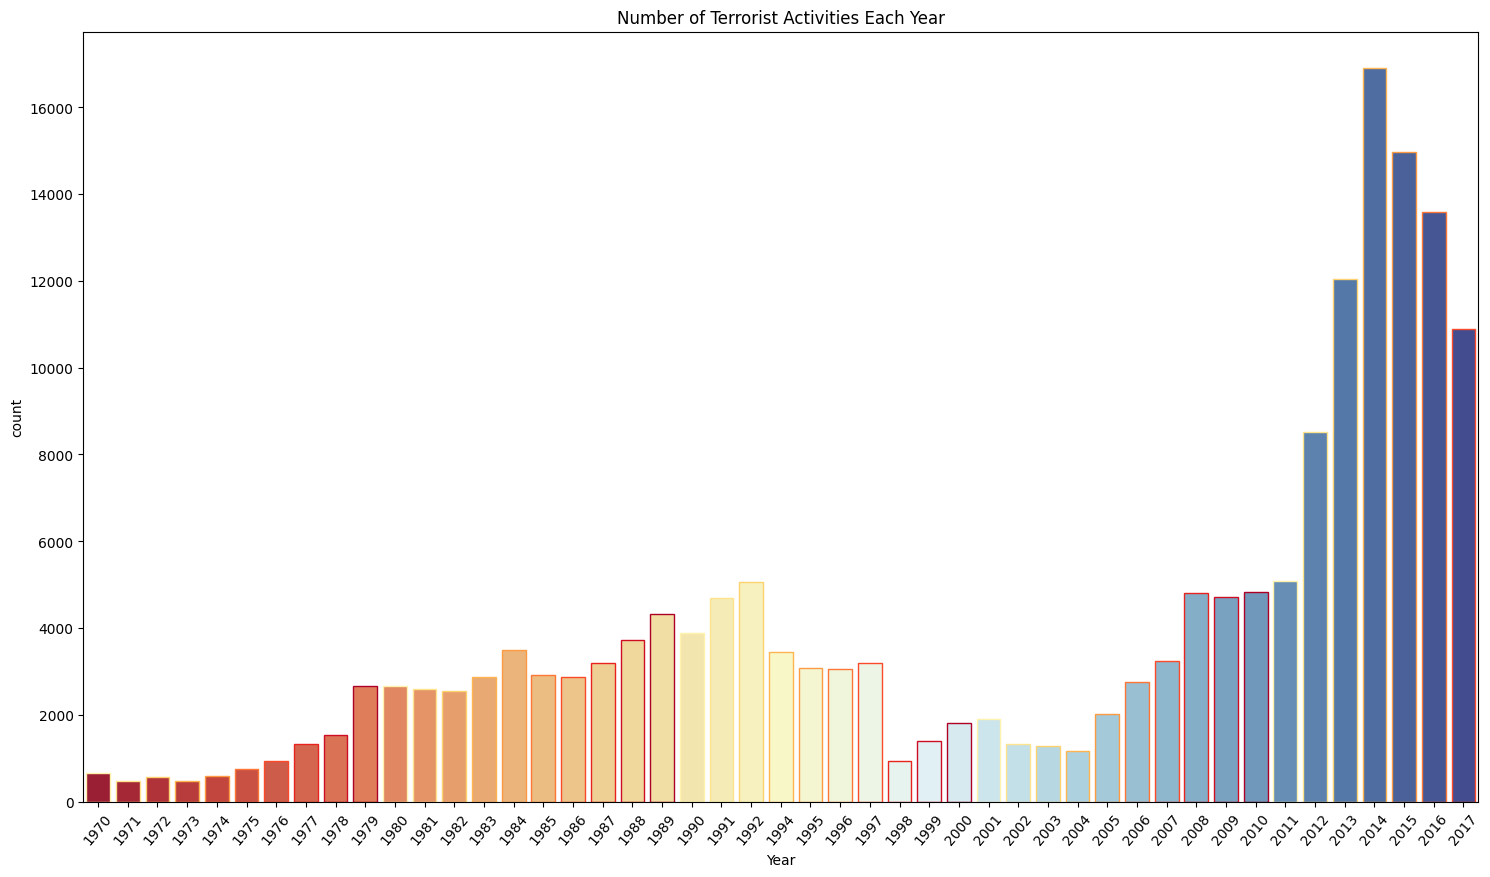

In [36]:
plt.subplots(figsize=(18,10))
sns.countplot('Year', data=df, palette='RdYlBu', edgecolor=sns.color_palette('YlOrRd', 10))
plt.xticks(rotation=50)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

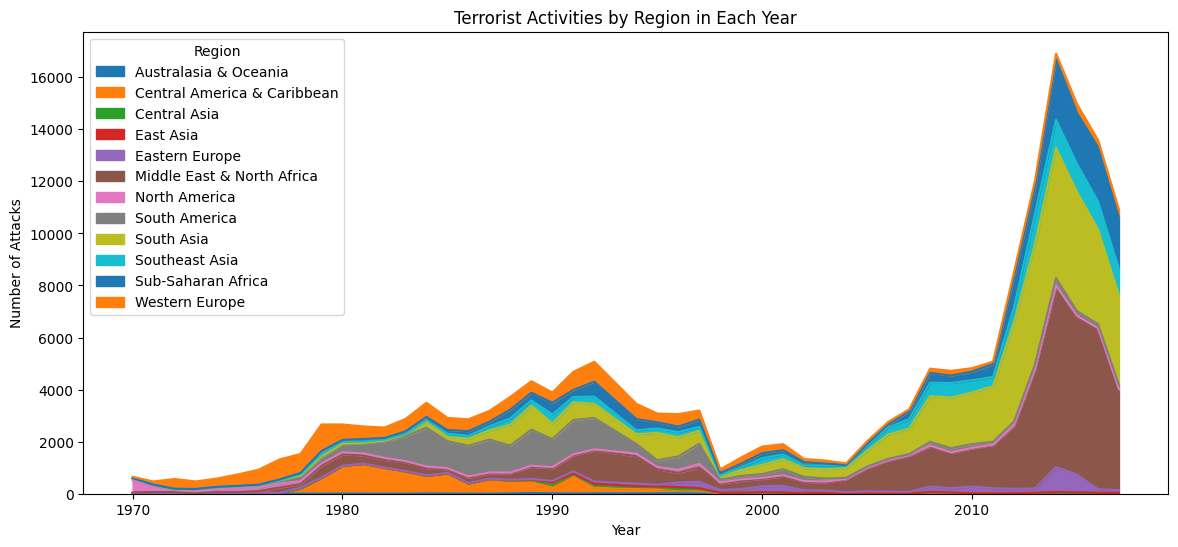

In [41]:
pd.crosstab(df.Year, df.Region).plot(kind='area', figsize=(14,6))
plt.title('Terrorist Activities by Region in Each Year')
ylabel('Number of Attacks')
plt.show()

In [42]:
att = df.Country.value_counts()
att.head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [43]:
df.Group.value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64

### Countries Affected by Terror Attacks

c:\ProgramData\Anaconda3\envs\streamlit_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


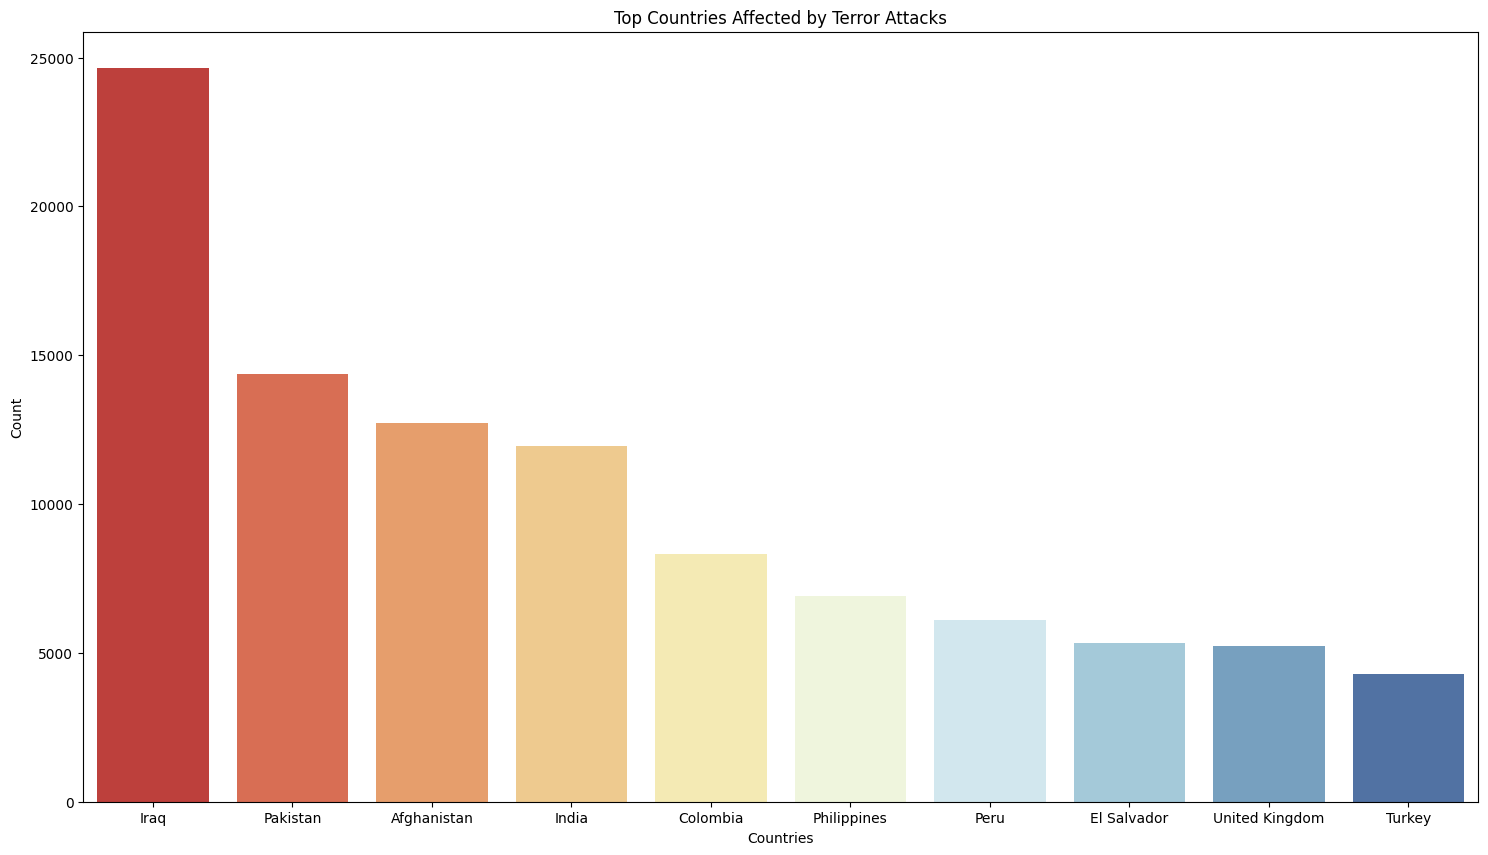

In [45]:
plt.subplots(figsize=(18,10))
sns.barplot(df['Country'].value_counts()[:10].index, df['Country'].value_counts()[:10].values, palette='RdYlBu')
plt.title('Top Countries Affected by Terror Attacks')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

### Describe the Data

In [46]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


### Number of People Killed in Terror Attack

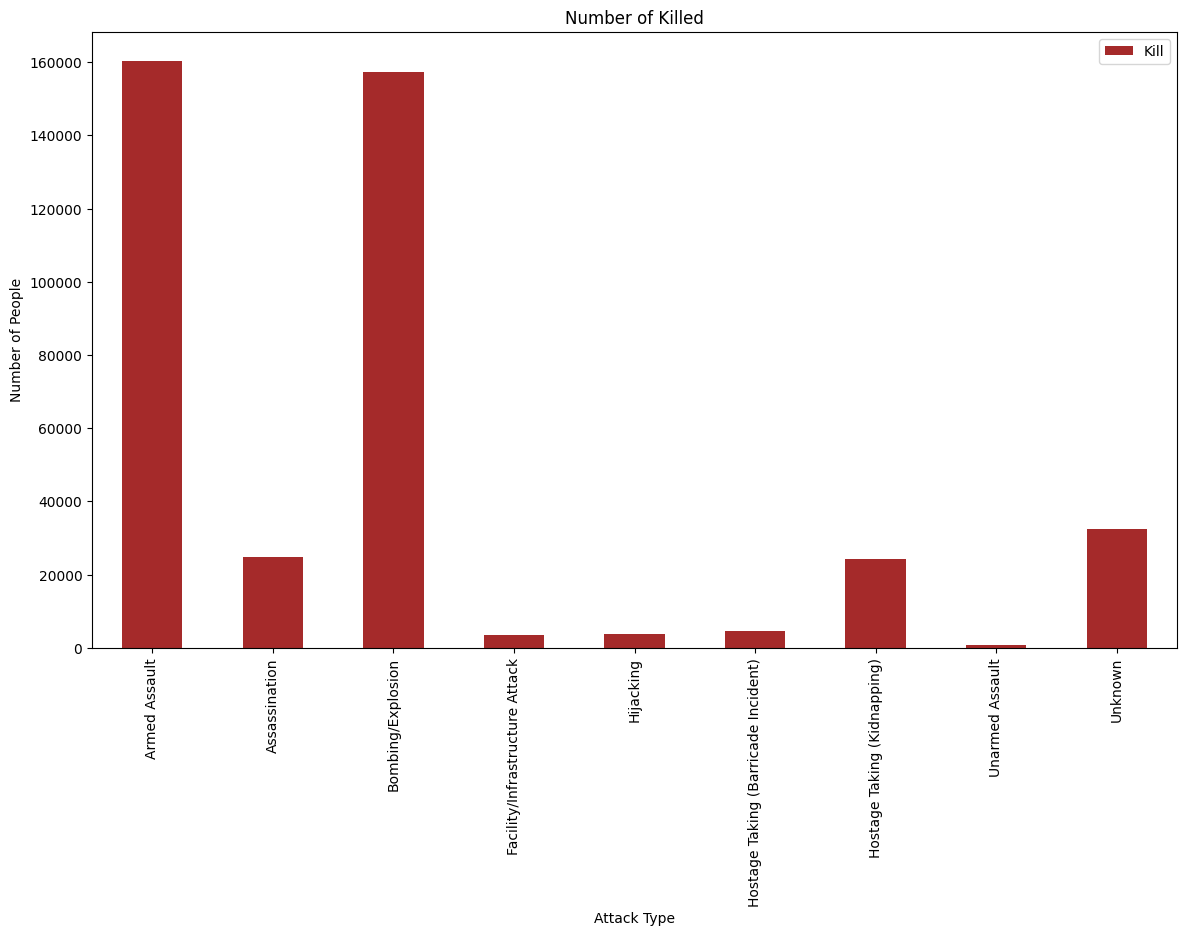

In [48]:
df[['AttackType', 'Kill']].groupby(['AttackType'], axis=0).sum().plot(kind='bar', figsize=(14,8), color='brown')
plt.title('Number of Killed')
plt.ylabel('Number of People')
plt.xlabel('Attack Type')
plt.show()

### Top 10 Terrorist Group Attack

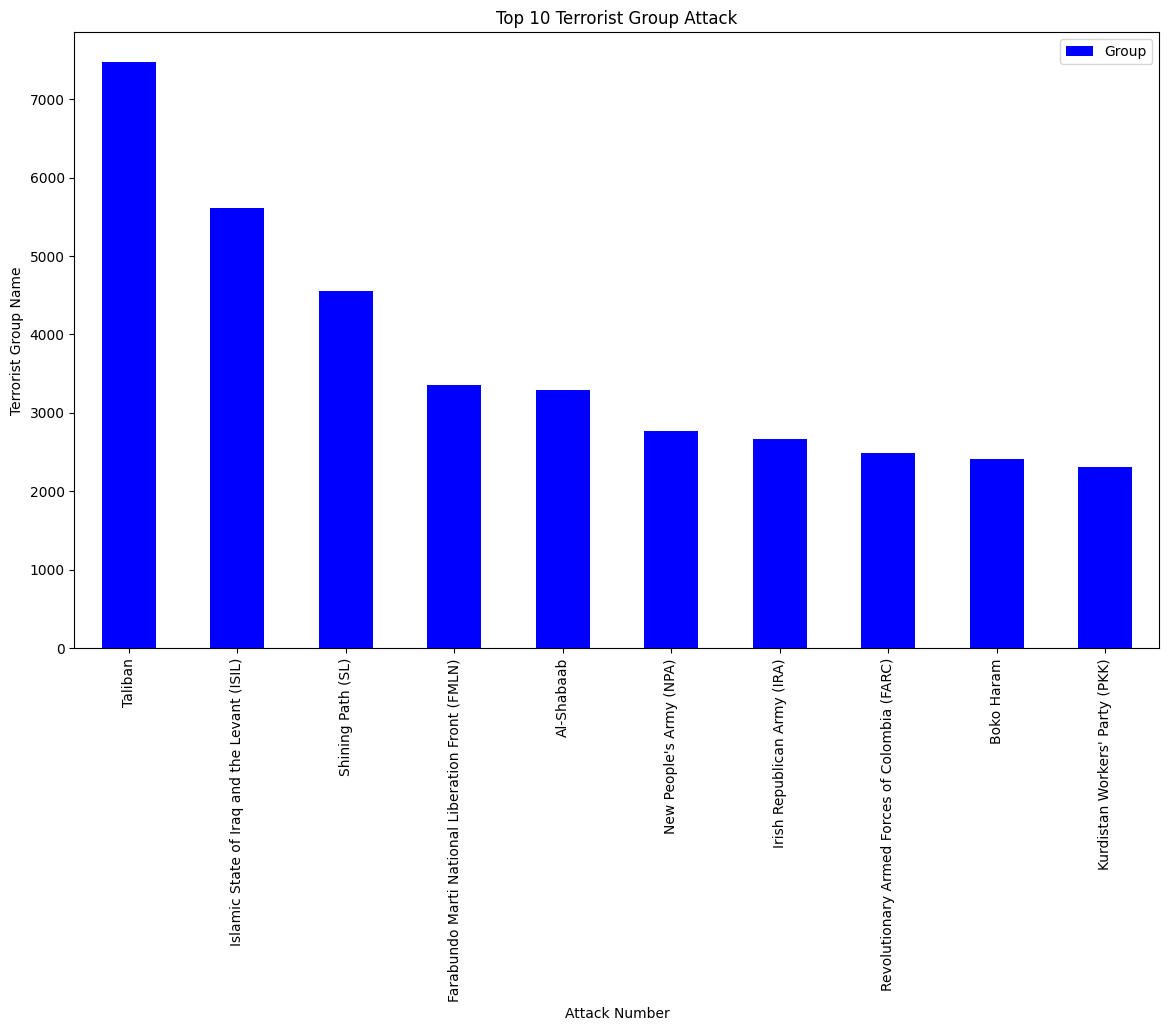

In [49]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar', figsize=(14,8), color='blue')
plt.title('Top 10 Terrorist Group Attack')
plt.ylabel('Terrorist Group Name')
plt.xlabel('Attack Number')
plt.show()

In [50]:
ds = df[['Group', 'Country', 'Kill']]
ds = ds.groupby(['Group', 'Country'], axis=0).sum().sort_values('Kill', ascending=False).drop('Unknown').reset_index()
ds.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14616\604973420.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ds = ds.groupby(['Group', 'Country'], axis=0).sum().sort_values('Kill', ascending=False).drop('Unknown').reset_index()


,Group,Country,Kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0


### Number of People killed by Terror Attack

In [52]:
k = df.loc[:, 'Kill']
print('Number of People killed by Terror Attack: ', int(sum(k.dropna())))

Number of People killed by Terror Attack:  411868


### Country with Most Attack

In [54]:
print('Country with the Most Attacks: ', df['Country'].value_counts().idxmax())

Country with the Most Attacks:  Iraq


## Done by Hifza Anjum